# Conduct multi-agent traffic-aware planning on the discrete graph

In [55]:
import sys
sys.path.append('../')
from panav.env import NavigationEnv, Box2DRegion, box_2d_center, PolygonRegion
from panav.hybrid import HybridGraph
from panav.viz import draw_hybrid,  draw_env

from panav.TrafficAwarePlanning import traffic_aware_HG_plan

import numpy as np
from matplotlib import pyplot as plt

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Empty environment

In [4]:

# 2D navigation environment

start_box_side = np.array([1,1])
goal_box_side = np.array([1,1])

top, bottom = 8,-8
start_x_offset = 6
goal_x_offset = 8
N = 6

start_locs = np.vstack([
np.vstack([np.ones(N)*start_x_offset,np.linspace(top,bottom, N)]).T,
np.vstack([np.ones(N)*(-start_x_offset),np.linspace(top,bottom, N)]).T])

goal_locs = np.vstack([
np.vstack([np.ones(N)*(-goal_x_offset),np.linspace(bottom,top, N)]).T,
np.vstack([np.ones(N)*goal_x_offset,np.linspace(bottom,top, N)]).T])


starts = [box_2d_center(s,start_box_side) for s in start_locs]
goals = [box_2d_center(g,goal_box_side) for g in goal_locs]

start = np.array(list(starts[0].centroid().coords)[0])
goal = np.array(list(goals[0].centroid().coords)[0])

limits = [(-10.0,10.0),(-10.0,10.0)]

bloating_r = 0.5 
env = NavigationEnv(limits,[],starts,goals)

# Multi-tunnel Environment

In [61]:
y_min,y_max = min(limits[1]),max(limits[1])
n_tunnel = 6
w = 2*bloating_r # Tunnel width
s = (y_max-y_min-w*n_tunnel)/(n_tunnel+1) # Spacing between tunnels

d = 5 # Thickness of the wall

obstacles = []
for i in range(n_tunnel+1):
    side = np.array([d,s])
    center = np.array([0, y_max-s/2-i*(s+w)])
    obstacles.append(box_2d_center(center,side))
env.obstacles = obstacles



/Users/tianpengzhang/opt/miniconda3/envs/PA-Nav/lib/python3.11/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)


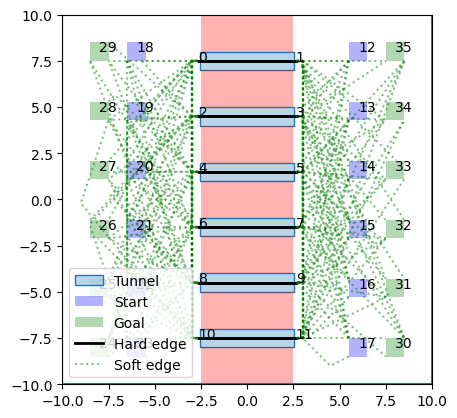

In [62]:
HG = HybridGraph(env,bloating_r)
ax = plt.gca()
draw_hybrid(HG,ax,display_soft=True,display_node=True)
plt.show()    

In [63]:
traffic_aware_HG_plan(HG)

[[12, 1, 0, 24],
 [13, 3, 2, 25],
 [14, 5, 4, 26],
 [15, 7, 6, 27],
 [16, 9, 8, 28],
 [17, 11, 10, 29],
 [18, 0, 1, 30],
 [19, 2, 3, 31],
 [20, 4, 5, 32],
 [21, 6, 7, 33],
 [22, 8, 9, 34],
 [23, 10, 11, 35]]

## The unicorn environment

In [52]:
from panav.env import approxCircle
o1 = Box2DRegion((-2.5,2.5),(2.5,5))
o2 = Box2DRegion((-2.5,2.5),(-5,-2.5))
o3 = PolygonRegion([(3.0,1.0),(3.0,-1.0),(7.5,0)])

obstacles = [o1,o2,o3]

env = NavigationEnv(limits,obstacles,starts,goals)

/Users/tianpengzhang/opt/miniconda3/envs/PA-Nav/lib/python3.11/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)


Path not find. Consider increasing the K value. Skipping edge  1 22
Path not find. Consider increasing the K value. Skipping edge  1 23
Path not find. Consider increasing the K value. Skipping edge  2 26
Path not find. Consider increasing the K value. Skipping edge  2 27
Path not find. Consider increasing the K value. Skipping edge  4 2
Path not find. Consider increasing the K value. Skipping edge  5 2
Path not find. Consider increasing the K value. Skipping edge  8 1
Path not find. Consider increasing the K value. Skipping edge  9 1


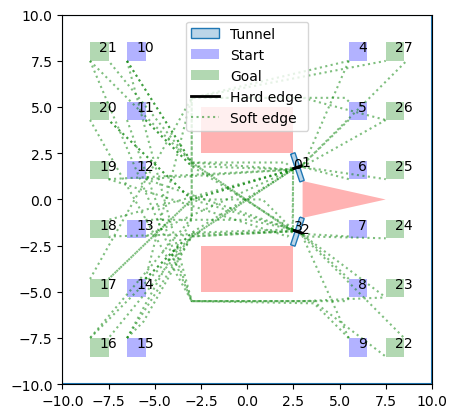

In [54]:
HG = HybridGraph(env,bloating_r)
ax = plt.gca()
draw_hybrid(HG,ax,display_soft=True,display_node=True)
plt.show()    

In [60]:
traffic_aware_HG_plan(HG)

[[4, 16],
 [5, 17],
 [6, 1, 0, 18],
 [7, 2, 3, 19],
 [8, 20],
 [9, 21],
 [10, 22],
 [11, 23],
 [12, 3, 2, 24],
 [13, 0, 1, 25],
 [14, 26],
 [15, 27]]